In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [2]:
atlCases = pd.read_csv('Covid-Data/atlCases.csv', parse_dates = [9])
jfkCases = pd.read_csv('Covid-Data/jfkCases.csv')
lgaCases = pd.read_csv('Covid-Data/lgaCases.csv')
seaCases = pd.read_csv('Covid-Data/seaCases.csv')
laxCases = pd.read_csv('Covid-Data/laxCases.csv')
yvrCases = pd.read_csv('Covid-Data/yvrCases.csv', parse_dates = [9])
yegCases = pd.read_csv('Covid-Data/yegCases.csv')
yyzCases = pd.read_csv('Covid-Data/yyzCases.csv')
yulCases = pd.read_csv('Covid-Data/yulCases.csv')

In [3]:
def makeTimestamp(x):
    return x.timestamp()

In [4]:
# Atlanta - Sketchy; need to take a look at it 
'''
plt.figure(figsize = (50,5))
plt.ylim(0,30000)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(atlCases["Date"], atlCases["Confirmed"])
plt.locator_params(axis='x', nbins=10)
plt.show()
'''

'\nplt.figure(figsize = (50,5))\nplt.ylim(0,30000)\nplt.xlabel("Mid-March to Mid October")\nplt.ylabel("# of New Cases")\nplt.plot(atlCases["Date"], atlCases["Confirmed"])\nplt.locator_params(axis=\'x\', nbins=10)\nplt.show()\n'

# YVR 

In [5]:
yvrCases.loc[0,"Difference"] = 0
yvrCases["timestamp"] = yvrCases["Date"].apply(makeTimestamp)
fit = stats.linregress(yvrCases["timestamp"], yvrCases["Difference"])
yvrCases["Prediction"] = yvrCases["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(5.667180601702926e-06, -8981.453237790729)

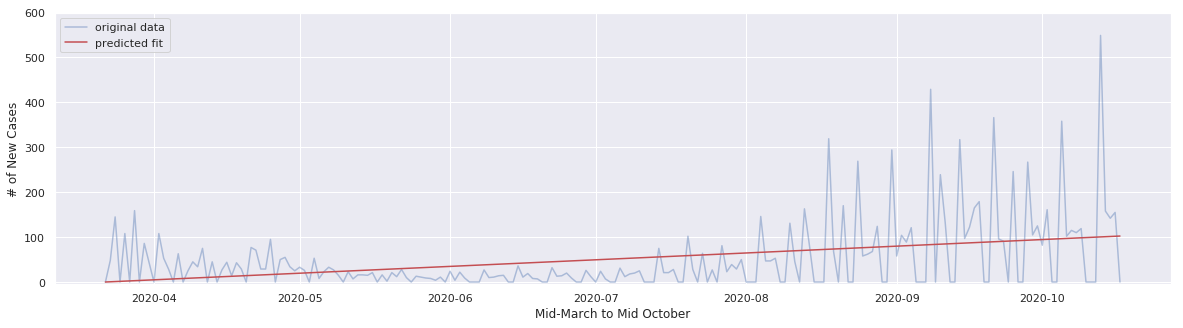

In [15]:
plt.figure(figsize = (20,5))
plt.ylim(-5,600)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(yvrCases["Date"], yvrCases["Difference"], 'b-', label = 'original data', alpha = 0.4)
plt.plot(yvrCases["Date"], yvrCases["Prediction"], 'r-', label = 'predicted fit')
plt.legend()
plt.show()

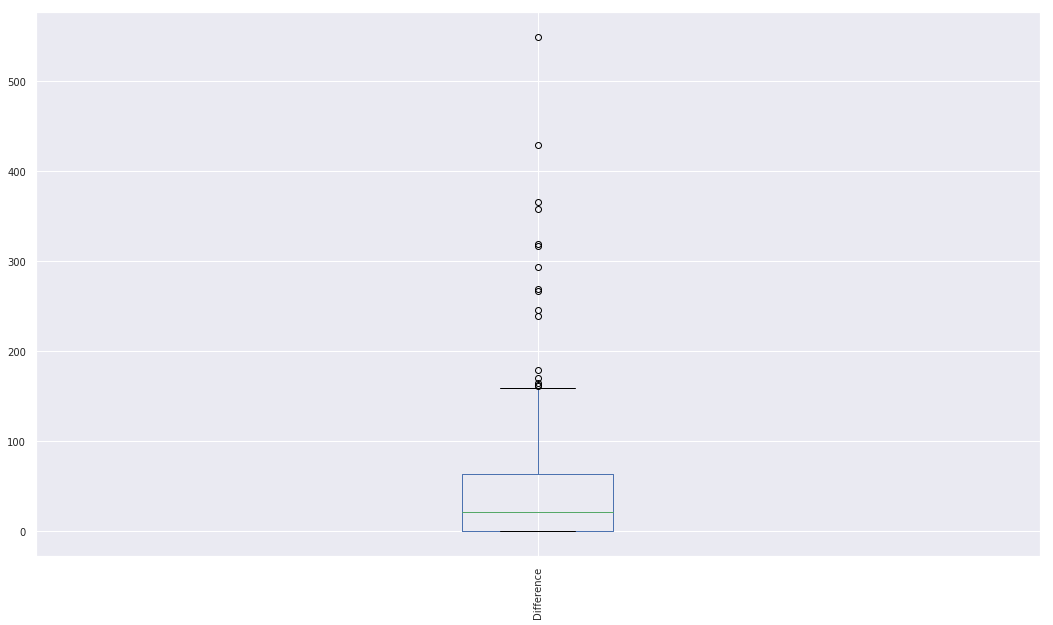

In [21]:
yvrCases.boxplot(column = ['Difference'], rot = 90, fontsize = 10, figsize = (18,10))

In [22]:
yvrCases.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Active,Case-Fatality_Ratio,Confirmed,Deaths,Incidence_Rate,Latitude,Longitude,Recovered,Difference,timestamp,Prediction
count,210.000000,210.000000,210.000000,210.000000,210.000000,142.000000,210.000000,210.000000,142.000000,2.100000e+02,2.100000e+02,210.000000,210.000000,2.100000e+02,210.000000
mean,104.500000,104.500000,104.500000,104.500000,782.123810,4.607453,4032.728571,163.742857,100.001486,5.372670e+01,-1.276476e+02,2989.590476,51.261905,1.593864e+09,51.261905
std,60.765944,60.765944,60.765944,60.765944,697.194106,1.468604,2673.724191,61.674718,51.002430,1.210809e-13,1.851825e-13,2500.996837,82.222146,5.250178e+06,29.753705
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.243275,424.000000,10.000000,50.127991,5.372670e+01,-1.276476e+02,0.000000,0.000000,1.584835e+09,0.094065
25%,52.250000,52.250000,52.250000,52.250000,187.000000,3.059466,2380.000000,132.750000,57.660886,5.372670e+01,-1.276476e+02,471.250000,0.000000,1.589350e+09,25.677985
50%,104.500000,104.500000,104.500000,104.500000,371.500000,4.956787,2947.000000,177.000000,76.972488,5.372670e+01,-1.276476e+02,2608.000000,21.000000,1.593864e+09,51.261905
75%,156.750000,156.750000,156.750000,156.750000,1404.500000,6.021505,5288.500000,203.000000,136.218217,5.372670e+01,-1.276476e+02,4177.750000,63.750000,1.598378e+09,76.845825
max,209.000000,209.000000,209.000000,209.000000,2244.000000,6.401249,11189.000000,251.000000,218.923532,5.372670e+01,-1.276476e+02,9425.000000,549.000000,1.602893e+09,102.429745
